In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import Counter

In [27]:
signal_df1 = pd.read_csv('../data/daily_absa_2022.csv')
signal_df2 = pd.read_csv('../data/daily_absa_2024.csv')
signal_df = pd.concat([signal_df1, signal_df2], ignore_index=True) 
sp500_df = pd.read_excel('../data/sp_500_constituents.xlsx')

In [28]:
signal_df[signal_df['entity'] == 'NVDA'].shape

(45, 6)

In [29]:
sp500_df

,PERMNO,Company Name,Ticker,SP500 Start,SP500 End,Search Keywords
0,10104,ORACLE CORP,ORCL,"Aug. 3, 1989","Dec. 31, 2024","ORCL, Oracle, Oracle Corp"
1,10107,MICROSOFT CORP,MSFT,1994-06-07 00:00:00,"Dec. 31, 2024","MSFT, Microsoft, Microsoft Corp"
2,10138,T ROWE PRICE GROUP INC,TROW,"Oct. 13, 1999","Dec. 31, 2024","T Rowe Price, T Rowe Price Group Inc, TROW, T ..."
3,10145,HONEYWELL INTERNATIONAL INC,HON,"Dec. 31, 1925","Dec. 31, 2024","HON, Honeywell, Honeywell International Inc"
4,10516,ARCHER DANIELS MIDLAND CO,ADM,1981-07-30 00:00:00,"Dec. 31, 2024","ADM, Archer Daniels Midland, Archer Daniels Mi..."
...,...,...,...,...,...,...
540,85331,Axon Enterprise,AXON,2023-05-04 00:00:00,"Dec. 31, 2024","AXON, Axon Enterprise"
541,76043,Fair Isaac,FICO,2023-03-20 00:00:00,"Dec. 31, 2024","FICO, Fair Isaac"
542,88537,Bunge Global,BG,2023-03-15 00:00:00,"Dec. 31, 2024","BG, Bunge Global"
543,92083,Insulet,PODD,2023-03-15 00:00:00,"Dec. 31, 2024","Insulet, PODD"


In [30]:
import re
import pandas as pd

# --- 1) Helpers --------------------------------------------------------------

def _split_keywords(s: str):
    if pd.isna(s) or not s:
        return []
    return [k.strip() for k in re.split(r"[,\|/;]", s) if k.strip()]

# --- 2) Build a simple alias → ticker map from sp500_df ----------------------

aliases_map = {}
for _, r in sp500_df.iterrows():
    ticker = str(r.get("Ticker", "")).strip()
    comps = [ticker, str(r.get("Company Name", "")).strip()]
    comps += _split_keywords(str(r.get("Search Keywords", "")))
    for alias in comps:
        alias = alias.strip()
        if alias:
            aliases_map[alias] = ticker

# --- 3) Exact match on the raw entity text -----------------------------------

signal_df = signal_df.copy()
signal_df["matched_ticker"] = (
    signal_df["entity"].astype(str).str.strip().map(aliases_map)
)

# signal_df["matched_ticker"] = (
#     signal_df["entity"].astype(str).str.strip().map(aliases_map)
# )




In [31]:
signal_df.matched_ticker.value_counts().tail(150)

matched_ticker
NVDA    45
F       42
V       37
SBUX    27
PSX     27
        ..
WM       1
AXP      1
CBOE     1
HAL      1
FICO     1
Name: count, Length: 150, dtype: int64

(array([150.,   1.,   0.,   2.,   1.,   4.,   0.,   6.,   7.,   4.,   2.,
          2.,   4.,   6.,   1.,   0.,   1.,   2.,   2.,   0.,   0.,   1.,
          1.,   2.,   1.,   1.,   2.,   2.,   0.,   2.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 5.61400e+01, 1.11280e+02, 1.66420e+02, 2.21560e+02,
        2.76700e+02, 3.31840e+02, 3.86980e+02, 4.42120e+02, 4.97260e+02,
        5.52400e+02, 6.07540e+02, 6.62680e+02, 7.17820e+02, 7.72960e+02,
        8.28100e+02, 8.83240e+02, 9.38380e+02, 9.93520e+02, 1.04866e+03,
        1.10380e+03, 1.15894e+03, 1.21408e+03, 1.26922e+03, 1.32436e+03,
        1.37950e+03, 1.43464e+03, 1.48978e+03, 1.54492e+03, 1.60006e+03,
        1.65520e+03, 1.71034e+03, 1.76548e+03, 1.82062e+03, 1.87576e+03,
        1.93090e+03, 1.98604e+03, 2.04118e+03, 2.09632e+03, 2.15146e+03,
        2.20660e+03, 2.26174e+03, 2.31688e+03, 2.37202e+03, 2.42716e+03,
 

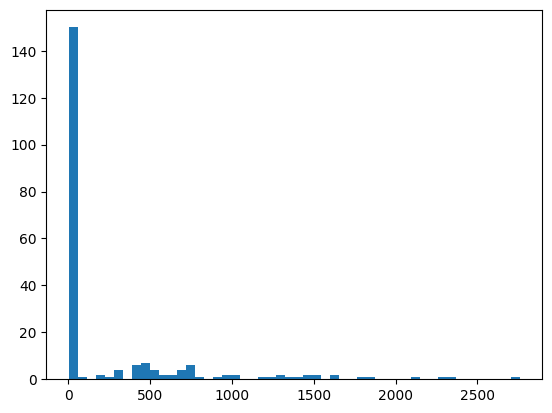

In [32]:
plt.hist(signal_df.matched_ticker.value_counts(), bins=50)

In [33]:
signal_df = signal_df.drop_duplicates(subset=['matched_ticker', 'date'])

In [34]:
signal_df[signal_df['matched_ticker'] == 'MSFT'].sort_values('date')

,Unnamed: 0,date,entity,classification,softmax,article_count,matched_ticker
131,131,2017-01-07,MSFT,NEUTRAL,"{'positive': 0.00512064435483458, 'neutral': 0...",1,MSFT
191,191,2017-01-10,MSFT,NEUTRAL,"{'positive': 0.008088285103440285, 'neutral': ...",1,MSFT
214,214,2017-01-11,MSFT,NEUTRAL,"{'positive': 0.008143684826791286, 'neutral': ...",1,MSFT
237,237,2017-01-12,MSFT,NEUTRAL,"{'positive': 0.0027094562246929854, 'neutral':...",2,MSFT
301,301,2017-01-16,MSFT,NEUTRAL,"{'positive': 0.02324111945927143, 'neutral': 0...",2,MSFT
...,...,...,...,...,...,...,...
55103,10722,2024-10-30,MSFT,POSITIVE,"{'positive': 0.5360137104988099, 'neutral': 0....",1,MSFT
55232,10851,2024-11-07,MSFT,NEGATIVE,"{'positive': 0.001029701204970479, 'neutral': ...",1,MSFT
55420,11039,2024-11-19,MSFT,NEGATIVE,"{'positive': 0.0010285103926435113, 'neutral':...",1,MSFT
55521,11140,2024-11-25,MSFT,NEUTRAL,"{'positive': 0.0025334896345157176, 'neutral':...",1,MSFT


In [35]:
signal_df.iloc[-100:]

,Unnamed: 0,date,entity,classification,softmax,article_count,matched_ticker
55949,11568,2024-12-24,GOOG,NEUTRAL,"{'positive': 0.0016030054539442062, 'neutral':...",1,GOOG
55950,11569,2024-12-24,GOOGL,NEUTRAL,"{'positive': 0.0016030054539442062, 'neutral':...",1,GOOGL
55951,11570,2024-12-24,HAS,POSITIVE,"{'positive': 0.3850029105912628, 'neutral': 0....",5,HAS
55952,11571,2024-12-24,IT,NEUTRAL,"{'positive': 0.07518131020700647, 'neutral': 0...",7,IT
55953,11572,2024-12-24,ON,NEUTRAL,"{'positive': 0.030030147627369136, 'neutral': ...",6,ON
...,...,...,...,...,...,...,...
56044,11663,2024-12-31,TGT,NEUTRAL,"{'positive': 0.02532791066914797, 'neutral': 0...",3,TGT
56045,11664,2025-01-01,A,NEUTRAL,"{'positive': 0.2797874023740979, 'neutral': 0....",4,A
56046,11665,2025-01-01,HAS,NEUTRAL,"{'positive': 0.21991715440526605, 'neutral': 0...",1,HAS
56047,11666,2025-01-01,IT,NEUTRAL,"{'positive': 0.010002410002925899, 'neutral': ...",3,IT


In [36]:
signal_df

,Unnamed: 0,date,entity,classification,softmax,article_count,matched_ticker
0,0,2017-01-01,AAPL,NEUTRAL,"{'positive': 0.010230648680590093, 'neutral': ...",2,AAPL
1,1,2017-01-01,AMZN,NEUTRAL,"{'positive': 0.19124966114759445, 'neutral': 0...",1,AMZN
2,2,2017-01-01,APP,NEUTRAL,"{'positive': 0.06706008844159762, 'neutral': 0...",2,APP
3,3,2017-01-01,BMY,NEUTRAL,"{'positive': 0.0006146261584945023, 'neutral':...",1,BMY
4,4,2017-01-01,D,NEUTRAL,"{'positive': 0.05939907248102827, 'neutral': 0...",4,D
...,...,...,...,...,...,...,...
56044,11663,2024-12-31,TGT,NEUTRAL,"{'positive': 0.02532791066914797, 'neutral': 0...",3,TGT
56045,11664,2025-01-01,A,NEUTRAL,"{'positive': 0.2797874023740979, 'neutral': 0....",4,A
56046,11665,2025-01-01,HAS,NEUTRAL,"{'positive': 0.21991715440526605, 'neutral': 0...",1,HAS
56047,11666,2025-01-01,IT,NEUTRAL,"{'positive': 0.010002410002925899, 'neutral': ...",3,IT


In [37]:
len(signal_df['matched_ticker'].unique())

213

In [38]:
classification_counts = Counter(signal_df['classification'])
classification_counts.most_common(10)

[('NEUTRAL', 47620), ('NEGATIVE', 5305), ('POSITIVE', 3121)]

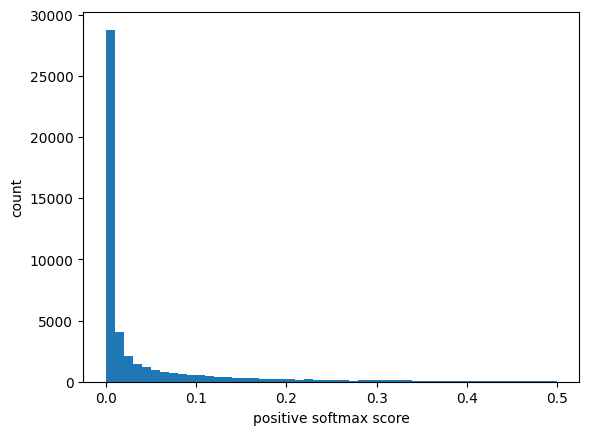

In [39]:
import ast
import matplotlib.pyplot as plt

pos_scores = (
    signal_df[signal_df['classification'] == 'NEUTRAL']['softmax']
        .dropna()
        .apply(ast.literal_eval)        # string -> dict
        .apply(lambda d: d['positive']) # extract positive prob
)

plt.hist(pos_scores, bins=50)
plt.xlabel("positive softmax score")
plt.ylabel("count")
plt.show()


In [40]:
filtered_df = signal_df.dropna(subset=['matched_ticker'])
filtered_df = filtered_df.rename(columns={'matched_ticker': 'TICKER'}) 

In [41]:
len(filtered_df['date'].unique())

2921

In [42]:
########################################
# WEEKLY SIGNAL AGGREGATION
########################################

import ast
import numpy as np


def _softmax_sentiment_score(value):
    """Convert stored softmax dict/string into a signed sentiment score."""
    if pd.isna(value):
        return np.nan
    if isinstance(value, dict):
        scores = value
    else:
        try:
            scores = ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return np.nan
    if not isinstance(scores, dict):
        return np.nan
    pos = float(scores.get('positive', 0.0))
    neg = float(scores.get('negative', 0.0))
    return pos - neg


def build_weekly_softmax_signal(df: pd.DataFrame) -> pd.DataFrame:
    work = df.dropna(subset=['TICKER']).copy()
    work['article_dt'] = pd.to_datetime(work['date'], utc=True, errors='coerce').dt.tz_convert(None)
    work['signal_score'] = work['softmax'].apply(_softmax_sentiment_score)
    work = work.dropna(subset=['article_dt', 'signal_score'])
    work['week_date'] = work['article_dt'].dt.to_period('W-THU').dt.start_time

    weekly = (
        work.groupby(['TICKER', 'week_date'])
            .agg({
                'signal_score': 'mean',
                'classification': lambda x: x.value_counts().idxmax(),
                'article_dt': 'count'
            })
            .rename(columns={'classification': 'top_class', 'article_dt': 'n_articles'})
            .reset_index()
    )
    weekly['signal_score'] = weekly['signal_score'].fillna(0.0)
    return weekly

weekly_signal = build_weekly_softmax_signal(filtered_df)
weekly_signal.head()


,TICKER,week_date,signal_score,top_class,n_articles
0,A,2022-12-30,-0.054686,NEUTRAL,5
1,A,2023-01-06,-0.140450,NEUTRAL,7
2,A,2023-01-13,-0.028613,NEUTRAL,7
3,A,2023-01-20,-0.078447,NEUTRAL,7
4,A,2023-01-27,-0.100962,NEUTRAL,7


In [43]:
weekly_signal[weekly_signal['TICKER'] == 'MSFT'].sort_values('week_date')

,TICKER,week_date,signal_score,top_class,n_articles
11200,MSFT,2017-01-06,-0.095761,NEUTRAL,4
11201,MSFT,2017-01-13,0.021881,NEUTRAL,3
11202,MSFT,2017-01-20,-0.039158,NEUTRAL,3
11203,MSFT,2017-01-27,-0.009326,NEUTRAL,4
11204,MSFT,2017-02-03,-0.003612,NEUTRAL,3
...,...,...,...,...,...
11543,MSFT,2024-10-25,0.532445,POSITIVE,1
11544,MSFT,2024-11-01,-0.980969,NEGATIVE,1
11545,MSFT,2024-11-15,-0.980965,NEGATIVE,1
11546,MSFT,2024-11-22,-0.316421,NEUTRAL,1


In [44]:
import pandas as pd
import numpy as np

def compute_ticker_weekly(
    ret_df: pd.DataFrame,
    lookback_weeks: int = 52,
    skip_weeks: int = 4,
    week_rule: str = "W-FRI",
    col_ticker: str = "TICKER",
    col_date: str = "date",
    col_ret: str = "RET",
    out_mom: str = "MOM",
    out_wret: str = "RET",
    return_daily_aligned: bool = False,
    ffill_to_next_week: bool = False
) -> pd.DataFrame:
    """
    Weekly L–G momentum using *weekly* compounded returns, also includes weekly returns.

    Momentum on week t is cumulative return from [t-(G+L)+1, ..., t-G] in weeks.

    If return_daily_aligned=False -> returns a weekly panel (PERMNO-week level).
    If return_daily_aligned=True  -> merges weekly MOM and weekly RET back to the daily panel.
    """
    df = ret_df.copy()
    df[col_date] = pd.to_datetime(df[col_date])
    df = df.sort_values([col_ticker, col_date])

    # === 1. Convert daily returns to weekly log-returns ===
    df["_logret"] = np.log1p(df[col_ret].astype(float).fillna(0.0).clip(lower=-0.999999))

    # === 2. Resample to weekly frequency per ticker ===
    wk = (
        df.set_index(col_date)
          .groupby(col_ticker, group_keys=True)["_logret"]
          .resample(week_rule)
          .sum()
          .rename("logret_w")
          .reset_index()
    )

    # Weekly compounded simple return
    wk[out_wret] = np.expm1(wk["logret_w"])

    # === 3. Compute cumulative sums of weekly log returns ===
    wk["csum"] = wk.groupby(col_ticker)["logret_w"].cumsum()

    # End of window: t - G
    wk["csum_end"] = wk.groupby(col_ticker)["csum"].shift(skip_weeks)

    # Start of window: t - (L+G)
    wk["csum_start"] = wk.groupby(col_ticker)["csum_end"].shift(lookback_weeks)

    wk_out = wk[[col_ticker, col_date, out_wret]].rename(columns={col_date: "week_date"})
    wk_out["week_date"] = pd.to_datetime(wk_out["week_date"]).dt.to_period("W-THU").dt.start_time

    # === 5. Return weekly panel ===
    if not return_daily_aligned:
        return wk_out

    # === 6. Or merge back to daily panel ===
    daily = ret_df.copy()
    daily[col_date] = pd.to_datetime(daily[col_date])

    # build mapping from each daily date to its week anchor (Friday)
    all_days = (
        daily[[col_date]]
        .drop_duplicates()
        .sort_values(col_date)
        .set_index(col_date)
    )
    anchors = all_days.resample(week_rule).last().index
    mapper = pd.Series(anchors, index=anchors)
    mapper = mapper.reindex(all_days.index, method="ffill")
    mapper.name = "week_date"
    mapper = mapper.reset_index().rename(columns={col_date: "date"})

    daily = daily.merge(mapper, left_on=col_date, right_on="date", how="left").drop(columns=["date"])
    out = daily.merge(wk_out, on=[col_ticker, "week_date"], how="left")

    if ffill_to_next_week:
        out = out.sort_values([col_ticker, col_date])
        out[[out_mom, out_wret]] = out.groupby(col_ticker)[[out_mom, out_wret]].ffill()

    return out


In [45]:
ret_df = pd.read_csv('momentum/s&p100ret.csv')
ret_df['TICKER'] = ret_df['TICKER'].str.strip() 
ret_df['RET'] = pd.to_numeric(ret_df['RET'], errors='coerce') 
ret_df['date'] = pd.to_datetime(ret_df['date'], format='%Y-%m-%d')
#ret_df = ret_df.dropna(subset=['RET'])
weekly_returns = compute_ticker_weekly(ret_df, lookback_weeks=12, skip_weeks=1)
weekly_returns.head()


/var/folders/b7/s8_nr_vd3bvcht_hmrmyy47h0000gn/T/ipykernel_93112/1046434888.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ret_df = pd.read_csv('momentum/s&p100ret.csv')


,TICKER,week_date,RET
0,AAPL,2019-01-04,-0.060099
1,AAPL,2019-01-11,0.027182
2,AAPL,2019-01-18,0.029747
3,AAPL,2019-01-25,0.005994
4,AAPL,2019-02-01,0.055527


In [46]:
weekly_alpha = (
    weekly_returns.merge(weekly_signal, on=['TICKER', 'week_date'], how='left')
        .rename(columns={'signal_score': 'SENT'})
        .sort_values(['week_date', 'TICKER'])
        .reset_index(drop=True)
)


In [47]:
########################################
# WEEKLY BACKTEST (NO LOOK-AHEAD)
########################################

import numpy as np

LONG_PCT = 0.2
SHORT_PCT = 0.2
LEVERAGE = 1.0
HOLDING_WEEKS = 1
SP500_RET_PATH = "../data/snp500_ret.csv"


def load_sp500_weekly(csv_path: str = SP500_RET_PATH) -> pd.DataFrame:
    sp = pd.read_csv(csv_path)
    sp = sp.rename(columns={'caldt': 'date', 'sprtrn': 'sp500_ret'})
    sp['date'] = pd.to_datetime(sp['date'])
    sp['sp500_ret'] = pd.to_numeric(sp['sp500_ret'], errors='coerce')
    sp = sp.dropna(subset=['sp500_ret'])
    sp['week_date'] = sp['date'].dt.to_period('W-THU').dt.start_time

    weekly = (
        sp.groupby('week_date')['sp500_ret']
          .apply(lambda x: (1 + x).prod() - 1)
          .reset_index(name='sp500_ret')
    )
    return weekly


def prepare_weekly_signal(df: pd.DataFrame, signal_col: str) -> pd.DataFrame:
    use_cols = ['week_date', 'TICKER', 'RET', signal_col]
    out = df[use_cols].dropna(subset=['RET']).copy()
    out['week_date'] = pd.to_datetime(out['week_date'])
    out['RET'] = pd.to_numeric(out['RET'], errors='coerce')
    return out.dropna(subset=['RET']).sort_values(['TICKER', 'week_date'])


def make_signal(df_slice: pd.DataFrame, col_signal: str) -> pd.Series:
    return df_slice.set_index('TICKER')[col_signal]


def construct_weights(signal_cs: pd.Series,
                      long_pct=LONG_PCT,
                      short_pct=SHORT_PCT,
                      gross_leverage=LEVERAGE) -> pd.Series:
    sig = signal_cs.dropna()
    if sig.empty:
        return pd.Series(dtype=float)
    n = len(sig)
    n_long = max(1, int(round(n * long_pct)))
    n_short = max(1, int(round(n * short_pct)))
    ranked = sig.sort_values(ascending=False)
    w_long = pd.Series(1 / n_long, index=ranked.index[:n_long])
    w_short = pd.Series(-1 / n_short, index=ranked.index[-n_short:])
    w = pd.concat([w_long, w_short])
    gross = w.abs().sum()
    if gross > 0:
        w *= gross_leverage / gross
    return w


def build_weight_panel(df: pd.DataFrame,
                       holding_weeks: int,
                       col_signal: str) -> pd.DataFrame:
    all_weeks = sorted(df['week_date'].unique())
    recs = []

    for w in all_weeks:
        cs_slice = df[df['week_date'] == w]
        sig_cs = make_signal(cs_slice, col_signal)
        w_cs = construct_weights(sig_cs)
        if w_cs.empty:
            continue

        hold_ix = all_weeks.index(w)
        hold_weeks = all_weeks[hold_ix: hold_ix + holding_weeks]

        for hw in hold_weeks:
            recs.append(pd.DataFrame({
                'week_date': hw,
                'TICKER': w_cs.index,
                'weight': w_cs.values
            }))

    if recs:
        return pd.concat(recs, ignore_index=True)
    else:
        return pd.DataFrame(columns=['week_date', 'TICKER', 'weight'])


def compute_pnl_timeseries(df: pd.DataFrame, weight_panel: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # *** KEY CHANGE: DO NOT USE FUTURE RETURNS ***
    # We treat RET as the realized return for that week_date.
    # No shift(-1), i.e., no explicit look-ahead here.
    merged = pd.merge(
        weight_panel,
        df[['TICKER', 'week_date', 'RET']],   # CHANGED: RET instead of RET_fwd
        on=['TICKER', 'week_date'],
        how='left'
    )

    merged['pnl'] = merged['weight'] * merged['RET']  # CHANGED: use RET

    def agg_pnl(x):
        long_pnl = x[x['weight'] > 0]['pnl'].sum()
        short_pnl = -1 * x[x['weight'] < 0]['pnl'].sum()
        return pd.Series({
            'port_ret_long': long_pnl,
            'port_ret_short': short_pnl,
            'port_ret': long_pnl - short_pnl
        })

    pnl = merged.groupby('week_date').apply(agg_pnl).reset_index()

    # Benchmark is the equal-weighted average RET across tickers that week
    # benchmark = (
    #     df.dropna(subset=['RET'])
    #       .groupby('week_date')['RET']       # CHANGED: RET instead of RET_fwd
    #       .mean()
    #       .rename('benchmark_ret')
    #       .reset_index()
    # )
    benchmark = (
        df.loc[df['SENT'] > 0]              # keep only rows with positive signal
        .dropna(subset=['RET'])          # make sure RET is not NaN
        .groupby('week_date')['RET']
        .mean()
        .rename('benchmark_ret')
        .reset_index()
    )
    pnl = pnl.merge(benchmark, on='week_date', how='left')
    pnl['benchmark_ret'] = pnl['benchmark_ret'].fillna(0.0)
    pnl['excess_ret'] = pnl['port_ret'] - pnl['benchmark_ret']

    # S&P 500 weekly benchmark (already aligned on week_date)
    sp500 = load_sp500_weekly()
    pnl = pnl.merge(sp500, on='week_date', how='left')
    pnl['sp500_ret'] = pnl['sp500_ret'].fillna(0.0)

    # Value curves
    pnl['port_value'] = (1 + pnl['port_ret']).cumprod()
    pnl['benchmark_value'] = (1 + pnl['benchmark_ret']).cumprod()
    pnl['sp500_value'] = (1 + pnl['sp500_ret']).cumprod()
    pnl['excess_value'] = (1 + pnl['excess_ret']).cumprod()

    return pnl


def run_weekly_signal_backtest(weekly_alpha: pd.DataFrame,
                               signal_col: str = 'SENT') -> dict:
    df = prepare_weekly_signal(weekly_alpha, signal_col)
    weight_panel = build_weight_panel(df, holding_weeks=HOLDING_WEEKS, col_signal=signal_col)
    weekly_perf = compute_pnl_timeseries(df, weight_panel)

    weeks = len(weekly_perf)
    horizon_weeks = min(weeks, 52 * 6)
    port_series = weekly_perf['port_value']
    value_6yr = port_series.iloc[horizon_weeks - 1] if horizon_weeks > 0 else np.nan

    weekly_ret = weekly_perf['port_ret']
    avg = weekly_ret.mean()
    vol = weekly_ret.std(ddof=1)
    sharpe = (avg / vol) * np.sqrt(52) if vol is not None and vol > 0 else np.nan

    roll_max = port_series.cummax()
    drawdown = (roll_max - port_series) / roll_max
    max_drawdown = drawdown.max() if not drawdown.empty else np.nan

    summary = {
        'start': weekly_perf['week_date'].min(),
        'end': weekly_perf['week_date'].max(),
        'weeks': weeks,
        'total_return': port_series.iloc[-1] - 1 if weeks else np.nan,
        'dollar_value_6yr': value_6yr,
        'annualized_sharpe': sharpe,
        'max_drawdown': max_drawdown,
        'sp500_total_return': weekly_perf['sp500_value'].iloc[-1] - 1 if weeks else np.nan
    }

    return {
        'weekly_perf': weekly_perf,
        'weights': weight_panel,
        'summary': summary
    }


backtest_results = run_weekly_signal_backtest(weekly_alpha, signal_col='SENT')
backtest_results['weekly_perf'].head()
backtest_results['summary']


/var/folders/b7/s8_nr_vd3bvcht_hmrmyy47h0000gn/T/ipykernel_93112/537180762.py:115: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pnl = merged.groupby('week_date').apply(agg_pnl).reset_index()


{'start': Timestamp('2019-01-04 00:00:00'),
 'end': Timestamp('2024-12-27 00:00:00'),
 'weeks': 313,
 'total_return': np.float64(1.3785911171407683),
 'dollar_value_6yr': np.float64(2.3973695246005513),
 'annualized_sharpe': np.float64(1.399063850678594),
 'max_drawdown': np.float64(0.1095542764151453),
 'sp500_total_return': np.float64(1.4026788056199004)}

In [27]:
df = prepare_weekly_signal(weekly_alpha, 'SENT')
df[df['week_date'] == pd.Timestamp('2019-01-04')].dropna()

,week_date,TICKER,RET,SENT
0,2019-01-04,AAPL,-0.060099,-0.143097
9,2019-01-04,AMZN,0.048882,-0.273174
12,2019-01-04,BA,0.014201,0.727858
16,2019-01-04,BKNG,-0.002827,-0.556648
18,2019-01-04,BMY,-0.089725,-0.013264
20,2019-01-04,CAT,0.008499,-0.124277
30,2019-01-04,DE,0.016827,-0.170547
41,2019-01-04,GOOG,0.033893,-0.006523
42,2019-01-04,GOOGL,0.031686,-0.289955
43,2019-01-04,GS,0.047889,-0.000468


In [28]:
backtest_results['weights'][backtest_results['weights']['week_date'] == pd.Timestamp('2024-12-27')]

,week_date,TICKER,weight
2596,2024-12-27,NOW,0.166667
2597,2024-12-27,COST,0.166667
2598,2024-12-27,TGT,0.166667
2599,2024-12-27,C,-0.166667
2600,2024-12-27,META,-0.166667
2601,2024-12-27,LOW,-0.166667


In [29]:
backtest_results['weekly_perf']['cum_ret_long'] = np.cumprod(1 + backtest_results['weekly_perf']['port_ret_long']) - 1
backtest_results['weekly_perf']['cum_ret_short'] = np.cumprod(1 + backtest_results['weekly_perf']['port_ret_short']) - 1
backtest_results['weekly_perf']['cum_ret'] = np.cumprod(1 + backtest_results['weekly_perf']['port_ret']) - 1
backtest_results['weekly_perf']['benchmark_cum_ret'] = np.cumprod(1 + backtest_results['weekly_perf']['benchmark_ret']) - 1
backtest_results['weekly_perf']['sp500_cum_ret'] = backtest_results['weekly_perf']['sp500_value'] - 1


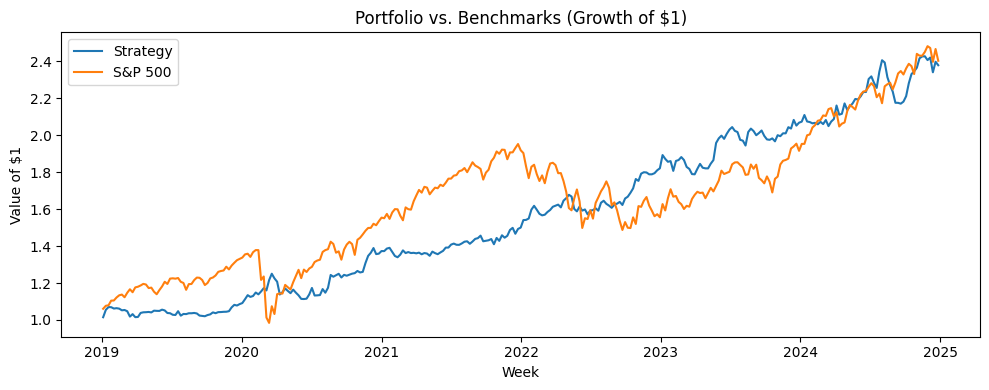

In [30]:
perf = backtest_results['weekly_perf']
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(perf['week_date'], perf['port_value'], label='Strategy')
ax.plot(perf['week_date'], perf['sp500_value'], label='S&P 500')
ax.set_title('Portfolio vs. Benchmarks (Growth of $1)')
ax.set_xlabel('Week')
ax.set_ylabel('Value of $1')
ax.legend()
plt.tight_layout()


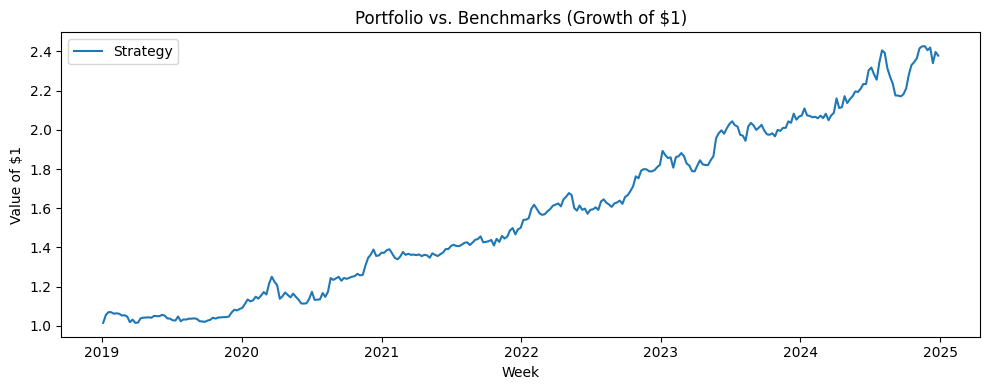

In [31]:
perf = backtest_results['weekly_perf']
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(perf['week_date'], perf['port_value'], label='Strategy')
ax.set_title('Portfolio vs. Benchmarks (Growth of $1)')
ax.set_xlabel('Week')
ax.set_ylabel('Value of $1')
ax.legend()
plt.tight_layout()


<Axes: title={'center': 'Weekly Momentum Backtest vs Benchmarks'}, xlabel='week_date'>

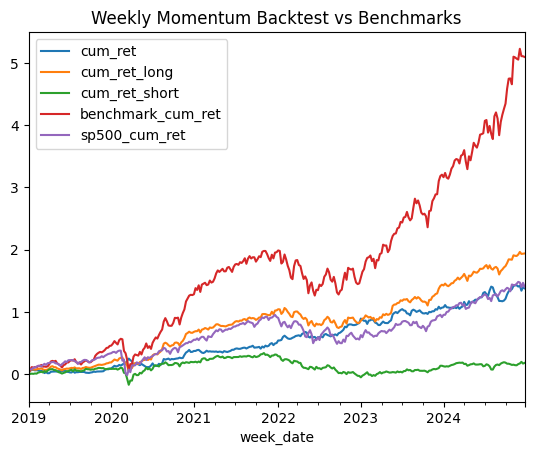

In [32]:
backtest_results['weekly_perf'][['week_date','cum_ret', 'cum_ret_long', 'cum_ret_short', 'benchmark_cum_ret', 'sp500_cum_ret']].plot(x='week_date', y=['cum_ret', 'cum_ret_long', 'cum_ret_short', 'benchmark_cum_ret', 'sp500_cum_ret'],
      title='Weekly Momentum Backtest vs Benchmarks')


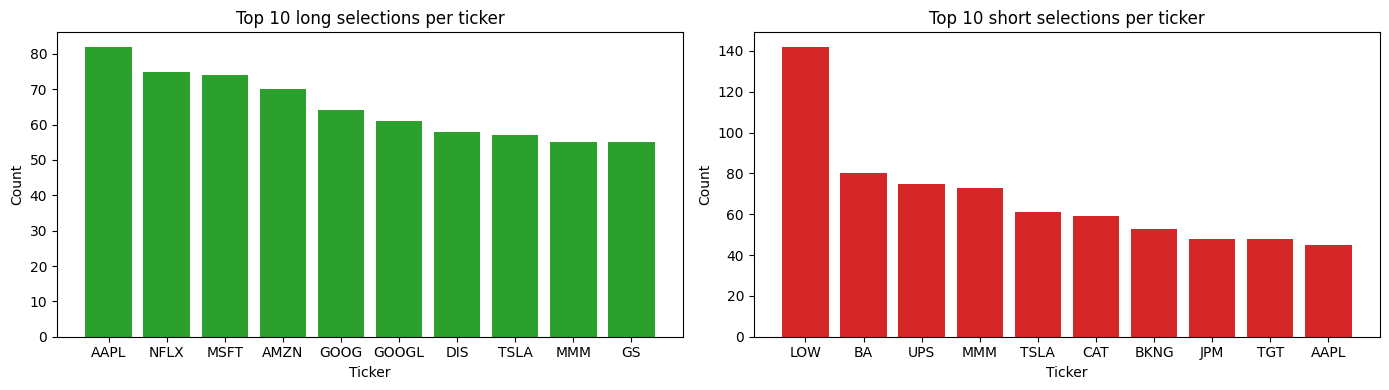

In [33]:
# Histogram: selection frequency by ticker
import matplotlib.pyplot as plt

weights = backtest_results['weights'].copy()
long_counts = (
    weights[weights['weight'] > 0]
        .groupby('TICKER')
        .size()
        .rename('long_count')
)
short_counts = (
    weights[weights['weight'] < 0]
        .groupby('TICKER')
        .size()
        .rename('short_count')
)
selection_counts = (
    pd.concat([long_counts, short_counts], axis=1)
      .fillna(0)
      .sort_values('long_count', ascending=False)
)
selection_counts.head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
top_long = long_counts.sort_values(ascending=False).head(10)
top_short = short_counts.sort_values(ascending=False).head(10)
axes[0].bar(top_long.index, top_long.values, color='tab:green')
axes[0].set_title('Top 10 long selections per ticker')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Ticker')

axes[1].bar(top_short.index, top_short.values, color='tab:red')
axes[1].set_title('Top 10 short selections per ticker')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Ticker')

plt.tight_layout()


In [34]:
len(selection_counts.index)

62

   horizon_weeks        ic
0              1  0.075398
1              2  0.028531
2              3  0.006470
3              4  0.002559
4              5 -0.017623


,horizon_weeks,ic
0,1,0.075398
1,2,0.028531
2,3,0.006470
3,4,0.002559
4,5,-0.017623


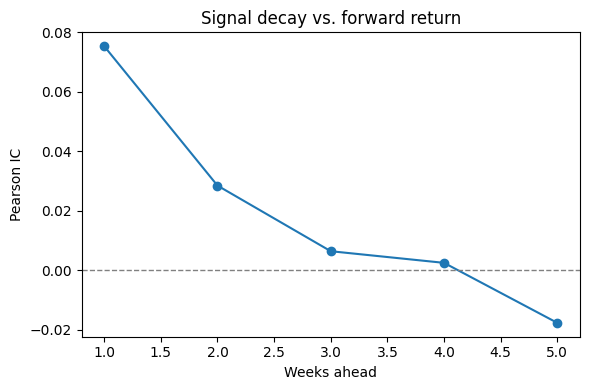

In [35]:
########################################
# SIGNAL DECAY: FUTURE IC
########################################

MAX_HORIZON = 5 # weeks into the future

def compute_future_ic(panel: pd.DataFrame, horizon: int) -> float:
    shifted = panel.copy()
    shifted['RET_fwd'] = shifted.groupby('TICKER')['RET'].shift(-horizon)
    records = []
    for date, g in shifted.groupby('week_date'):
        if g['SENT'].notna().sum() < 5:
            continue
        ic = g['SENT'].corr(g['RET_fwd'])
        if pd.notna(ic):
            records.append(ic)
    return np.mean(records) if records else np.nan

future_ics = []
for h in range(1, MAX_HORIZON + 1):
    ic_val = compute_future_ic(weekly_alpha, h)
    future_ics.append({'horizon_weeks': h, 'ic': ic_val})

decay_df = pd.DataFrame(future_ics)
print(decay_df)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(decay_df['horizon_weeks'], decay_df['ic'], marker='o')
ax.axhline(0, color='gray', linewidth=1, linestyle='--')
ax.set_xlabel('Weeks ahead')
ax.set_ylabel('Pearson IC')
ax.set_title('Signal decay vs. forward return')
plt.tight_layout()
decay_df


In [40]:
########################################
# RANK IC & T-STAT
########################################

from scipy import stats

weekly_alpha_sorted = weekly_alpha.sort_values(['week_date', 'TICKER']).copy()
ic_records = []
for date, g in weekly_alpha_sorted.groupby('week_date'):
    if g['SENT'].notna().sum() < 3:
        continue
    ic = g['SENT'].corr(g['RET'], method='spearman')
    ic_records.append({'week_date': date, 'rank_ic': ic})

ic_df = pd.DataFrame(ic_records).dropna()
mean_ic = ic_df['rank_ic'].mean() if not ic_df.empty else np.nan
std_ic = ic_df['rank_ic'].std(ddof=1) if len(ic_df) > 1 else np.nan
t_stat = (mean_ic / (std_ic / np.sqrt(len(ic_df)))) if std_ic and std_ic > 0 else np.nan

print(f'Mean rank IC: {mean_ic:.4f}')
print(f'T-stat: {t_stat:.2f}')
ic_df.head()


Mean rank IC: 0.0391
T-stat: 2.96


,week_date,rank_ic
0,2019-01-04,0.214035
1,2019-01-11,0.412030
2,2019-01-18,0.210390
3,2019-01-25,-0.089783
4,2019-02-01,-0.291228


Pearson corr (sentiment vs. momentum): 0.0770
Spearman rank corr: 0.0932
Rank-corr t-stat: 7.38 (n=6224)


,TICKER,week_date,RET,SENT,top_class,n_articles,MOM
0,AAPL,2019-03-29,-0.005758,0.218582,NEUTRAL,3.0,0.216357
9,AMZN,2019-03-29,0.009053,-0.004698,NEUTRAL,6.0,0.174966
12,BA,2019-03-29,0.053152,-0.185323,NEUTRAL,2.0,0.128703
16,BKNG,2019-03-29,0.013544,-0.267629,NEUTRAL,1.0,-0.000483
18,BMY,2019-03-29,-0.009344,0.435676,NEUTRAL,1.0,-0.065071


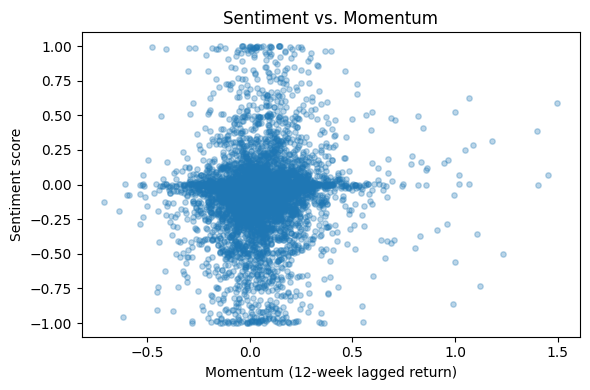

In [41]:
########################################
# SENTIMENT VS MOMENTUM
########################################

LOOKBACK_WEEKS = 12

mom_panel = weekly_returns.sort_values(['TICKER', 'week_date']).copy()
mom_panel['logret'] = np.log1p(mom_panel['RET'].clip(lower=-0.999999))
mom_panel['mom_log'] = (
    mom_panel.groupby('TICKER')['logret']
             .transform(lambda s: s.rolling(window=LOOKBACK_WEEKS, min_periods=LOOKBACK_WEEKS)
                                   .sum()
                                   .shift(1))
)
mom_panel['MOM'] = np.expm1(mom_panel['mom_log'])
momentum_panel = mom_panel.dropna(subset=['MOM'])[['TICKER', 'week_date', 'MOM']]

alpha_mom = (
    weekly_alpha.merge(momentum_panel, on=['TICKER', 'week_date'], how='inner')
                .dropna(subset=['SENT', 'MOM'])
)

pearson_corr = alpha_mom['SENT'].corr(alpha_mom['MOM'])
spearman_corr = alpha_mom['SENT'].corr(alpha_mom['MOM'], method='spearman')
obs = len(alpha_mom)
t_stat = (spearman_corr * np.sqrt((obs - 2) / (1 - spearman_corr**2))) if obs > 2 and abs(spearman_corr) < 1 else np.nan

print(f"Pearson corr (sentiment vs. momentum): {pearson_corr:.4f}")
print(f"Spearman rank corr: {spearman_corr:.4f}")
print(f"Rank-corr t-stat: {t_stat:.2f} (n={obs})")

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(alpha_mom['MOM'], alpha_mom['SENT'], alpha=0.3, s=15)
ax.set_xlabel(f'Momentum ({LOOKBACK_WEEKS}-week lagged return)')
ax.set_ylabel('Sentiment score')
ax.set_title('Sentiment vs. Momentum')
plt.tight_layout()
alpha_mom.head()


In [44]:
########################################
# REGRESSION INFERENCE (RET ~ SENT)
########################################

import statsmodels.api as sm

reg_df = weekly_alpha.dropna(subset=['SENT', 'RET']).copy()
reg_df['RET'] = reg_df['RET'].astype(float)

if len(reg_df) < 5:
    print('Not enough observations for regression.')
else:
    X = sm.add_constant(reg_df['SENT'])
    model = sm.OLS(reg_df['RET'], X).fit(cov_type='HC1')
    print(model.summary())
    coeffs = model.params.rename({'const': 'alpha', 'SENT': 'beta_sent'})
    print('Robust t-stats:')
    print(model.tvalues)
    coeffs


                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.81
Date:                Wed, 19 Nov 2025   Prob (F-statistic):            0.00101
Time:                        16:29:33   Log-Likelihood:                 10201.
No. Observations:                6487   AIC:                        -2.040e+04
Df Residuals:                    6485   BIC:                        -2.038e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.001      7.369      0.0

In [45]:
########################################
# REGRESSION INFERENCE (MOM ~ SENT)
########################################

import statsmodels.api as sm

reg_df = alpha_mom.dropna(subset=['MOM', 'SENT']).copy()
reg_df['MOM'] = reg_df['MOM'].astype(float)

if len(reg_df) < 5:
    print('Not enough observations for regression.')
else:
    X = sm.add_constant(reg_df['SENT'])
    model = sm.OLS(reg_df['MOM'], X).fit(cov_type='HC1')
    print(model.summary())
    coeffs = model.params.rename({'const': 'alpha', 'SENT': 'beta_sent'})
    print('Robust t-stats:')
    print(model.tvalues)
    coeffs


                            OLS Regression Results                            
Dep. Variable:                    MOM   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     29.68
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           5.28e-08
Time:                        16:29:34   Log-Likelihood:                 2143.0
No. Observations:                6224   AIC:                            -4282.
Df Residuals:                    6222   BIC:                            -4269.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0537      0.002     23.745      0.0